In [19]:
import os
from tqdm import tqdm
from torch import nn, optim
import torch
from torch.utils.data import DataLoader
from dataloader_future import *
from model_future import *
from torchvision.utils import save_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SensorFusion(device=device).to(device)

weights = r'C:\Users\Paradox\Desktop\git\multimodel\log_future\1C\models\weights_itr_65.pth'

if os.path.exists(weights):
    model.load_state_dict(torch.load(weights))
    print('successfully')
else:
    print('no loading')

successfully


In [20]:
ls=[]
real=[]
real_exp=[]
exp_20=[]

val_path = r'val_future'

filename_list = []
for i in range(len(os.listdir(os.path.join(val_path, "D_real")))):
    filename_list.append("{}.npy".format(i))

datasets_val = DataLoader(MyDataset(val_path, filename_list), batch_size=1, shuffle=False)

epoch_loss = 0
model.eval()
val_loop = tqdm(datasets_val)
for i, (image, us_image, F, P, D, label_F, label_P, label_D, label_F_20, label_P_20, label_D_20) in enumerate(val_loop):
    image = image.to(device)
    us_image = us_image.to(device)

    F = F.to(device)
    P = P.to(device)
    D = D.to(device)

    label_F = label_F.to(device)
    label_P = label_P.to(device)
    label_D = label_D.to(device)
    real.append(P)
    real_exp.append(label_P)

    F_out, P_out, D_out, F_20_out, P_20_out, D_20_out = model(image, us_image, F, P, D)
    
    
    #P_out=P_out.squeeze(dim=0)
    #P_out=P_out.cpu().detach().numpy()/10000

    
    
    ls.append(P_out)
    exp_20.append(P_20_out)
    
print(epoch_loss)

100%|████████████████████████████████████████████████████████████████████████████████| 242/242 [00:08<00:00, 28.83it/s]

0


In [21]:
real=[i[0].cpu().detach().numpy()/10000 for i in real]
ls=[i[0].cpu().detach().numpy()/10000 for i in ls]
real_exp=[i[0].cpu().detach().numpy()/10000 for i in real_exp]
exp_20=[i[0].cpu().detach().numpy()/10000 for i in exp_20]

In [22]:
exp_20

[array([ 0.46372432, -0.03790335,  0.13316217], dtype=float32),
 array([ 0.47205493, -0.03958539,  0.12850045], dtype=float32),
 array([ 0.4765618 , -0.04058648,  0.12489458], dtype=float32),
 array([ 0.47810742, -0.04081644,  0.1235381 ], dtype=float32),
 array([ 0.4794538 , -0.04114619,  0.12237226], dtype=float32),
 array([ 0.48122472, -0.04143515,  0.121338  ], dtype=float32),
 array([ 0.48248106, -0.04169266,  0.12032568], dtype=float32),
 array([ 0.48393607, -0.04198086,  0.11936741], dtype=float32),
 array([ 0.48402685, -0.04197276,  0.11954967], dtype=float32),
 array([ 0.4838558 , -0.04193975,  0.1194675 ], dtype=float32),
 array([ 0.48387492, -0.04193734,  0.11960033], dtype=float32),
 array([ 0.48374575, -0.04194963,  0.119539  ], dtype=float32),
 array([ 0.48379678, -0.04197073,  0.11953097], dtype=float32),
 array([ 0.4837415 , -0.04195579,  0.11959187], dtype=float32),
 array([ 0.48388788, -0.04191265,  0.11959392], dtype=float32),
 array([ 0.48277637, -0.04175218,  0.120

In [23]:
import matplotlib.pyplot as plt
x=np.arange(1,len(ls)+1)

In [24]:
real_P_Z=[]
predict_P_Z=[]
real_P_X=[]
predict_P_X=[]
real_P_Y=[]
predict_P_Y=[]
real_exp_X=[]
real_exp_Y=[]
real_exp_Z=[]
exp_20_X=[]
exp_20_Y=[]
exp_20_Z=[]

for i in range(len(real)):
    real_P_Z.append(real[i][2])
    predict_P_Z.append(ls[i][2])
    real_P_X.append(real[i][0])
    predict_P_X.append(ls[i][0])
    real_P_Y.append(real[i][1])
    predict_P_Y.append(ls[i][1])
    real_exp_X.append(real_exp[i][0])
    real_exp_Y.append(real_exp[i][1])
    real_exp_Z.append(real_exp[i][2])
    
    exp_20_X.append(exp_20[i][0])
    exp_20_Y.append(exp_20[i][1])
    exp_20_Z.append(exp_20[i][2])

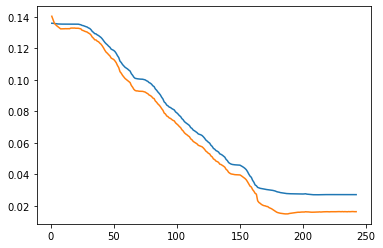

In [25]:
x=np.arange(1,len(real_P_Z)+1)
plt.plot(x,real_P_Z)
plt.plot(x,predict_P_Z)
plt.show()

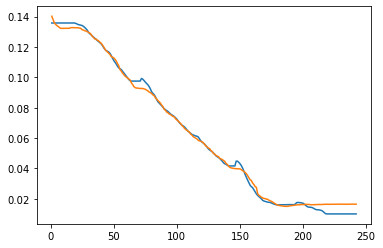

In [26]:
x=np.arange(1,len(real_exp_Z)+1)
plt.plot(x,real_exp_Z)
plt.plot(x,predict_P_Z)
plt.show()

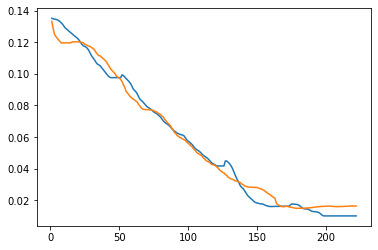

In [27]:
real_exp_Z=real_exp_Z[20:]
x=np.arange(1,len(real_exp_Z)+1)
plt.plot(x,real_exp_Z)
plt.plot(x,exp_20_Z[:-20])
plt.show()